# Análise exploratória com conjunto de dados do Kaggle

In [1]:
# Bibliotecas utilizadas
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
sns.set(style="darkgrid")
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (12,8)

In [3]:
df_auto = pd.read_csv('autos.csv', encoding = 'latin-1')
df_auto.head(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-05 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Offer,650,test,limousine,1995,manuell,102,...,33775,2016-04-06 19:17:07,2016,2016,April,April,2,19,21,2
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Offer,2200,test,cabrio,2004,manuell,109,...,67112,2016-04-05 18:18:39,2016,2016,April,April,4,18,12,4
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Offer,0,test,limousine,1980,manuell,50,...,19348,2016-03-25 16:47:58,2016,2016,March,March,4,16,36,5
8,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Offer,999,test,kleinwagen,1998,manuell,101,...,27472,2016-03-31 17:17:06,2016,2016,March,March,14,17,18,11
9,2016-03-26 19:54:18,Mazda_3_1.6_Sport,privat,Offer,2000,control,limousine,2004,manuell,105,...,96224,2016-04-06 10:45:34,2016,2016,March,March,11,10,12,1


In [4]:
df_auto.shape

(313687, 27)

In [5]:
df_auto.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen',
       'yearOfCreation', 'yearCrawled', 'monthOfCreation', 'monthCrawled',
       'NoOfDaysOnline', 'NoOfHrsOnline', 'yearsOld', 'monthsOld'],
      dtype='object')

In [6]:
#Apenas no fuelType há valores nulos
df_auto.isnull().sum()

dateCrawled              0
name                     0
seller                   0
offerType                0
price                    0
abtest                   0
vehicleType              0
yearOfRegistration       0
gearbox                  0
powerPS                  0
model                    0
kilometer                0
monthOfRegistration      0
fuelType               189
brand                    0
notRepairedDamage        0
dateCreated              0
postalCode               0
lastSeen                 0
yearOfCreation           0
yearCrawled              0
monthOfCreation          0
monthCrawled             0
NoOfDaysOnline           0
NoOfHrsOnline            0
yearsOld                 0
monthsOld                0
dtype: int64

In [7]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313687 entries, 0 to 313686
Data columns (total 27 columns):
dateCrawled            313687 non-null object
name                   313687 non-null object
seller                 313687 non-null object
offerType              313687 non-null object
price                  313687 non-null int64
abtest                 313687 non-null object
vehicleType            313687 non-null object
yearOfRegistration     313687 non-null int64
gearbox                313687 non-null object
powerPS                313687 non-null int64
model                  313687 non-null object
kilometer              313687 non-null int64
monthOfRegistration    313687 non-null object
fuelType               313498 non-null object
brand                  313687 non-null object
notRepairedDamage      313687 non-null object
dateCreated            313687 non-null object
postalCode             313687 non-null int64
lastSeen               313687 non-null object
yearOfCreation      

# Distribuição de Veículos com base no Ano de Registro

Text(0,0.5,'Densidade (KDE)')

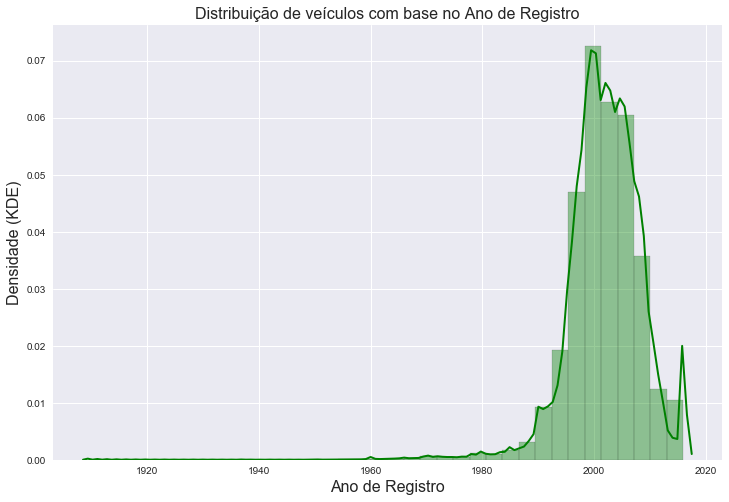

In [8]:
#Aqui criamos um gráfico de densidade
sns.distplot(df_auto.yearOfRegistration, hist=True, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.title('Distribuição de veículos com base no Ano de Registro', fontdict = {'size': 16})
plt.xlabel('Ano de Registro', fontdict = {'size': 16})
plt.ylabel('Densidade (KDE)', fontdict = {'size': 16})

# Variação da faixa de preço pelo tipo de veículo

In [9]:
cars = df_auto[['vehicleType','price']]

Text(0.5,1,'Análise de Outliers')

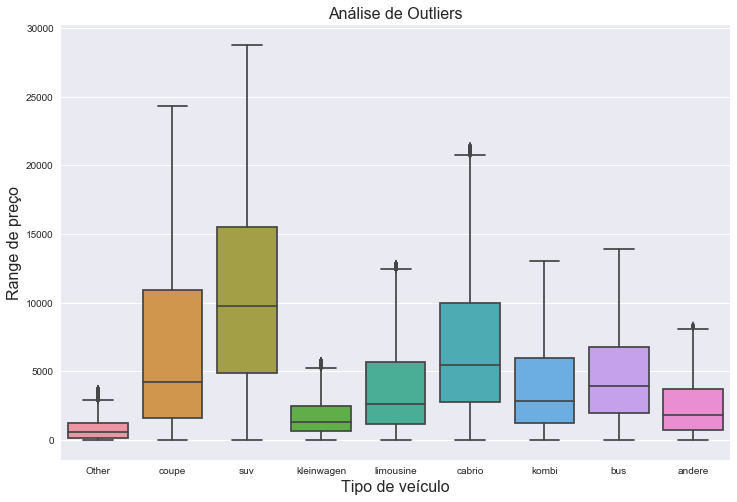

In [10]:
# Criamos um boxplot para avaliar os outliers
sns.boxplot(x = 'vehicleType', y = 'price', data = cars)
plt.xlabel('Tipo de veículo', fontdict = {'size': 16})
plt.ylabel('Range de preço', fontdict = {'size': 16})
plt.title('Análise de Outliers', fontdict = {'size': 16})

# Contagem total de veículos à venda conforme o tipo de veículo

Text(0.5,1,'Contagem total de veículos à venda conforme o tipo de veículo')

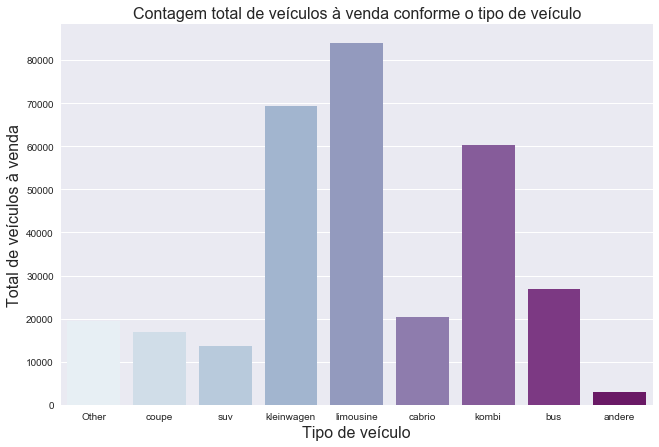

In [11]:
# Aqui criamos um Count plot para saber quantos carros estão à venda conforme seu modelo
sns.factorplot(x="vehicleType", data=df_auto, kind="count", palette="BuPu", size=6, aspect=1.5)
plt.xlabel('Tipo de veículo', fontdict = {'size': 16})
plt.ylabel('Total de veículos à venda', fontdict = {'size': 16})
plt.title('Contagem total de veículos à venda conforme o tipo de veículo', fontdict = {'size': 16})

# Número de veículos pertencentes a cada marca

Text(0.5,1,'Números de veículos pertencentes a cada marca')

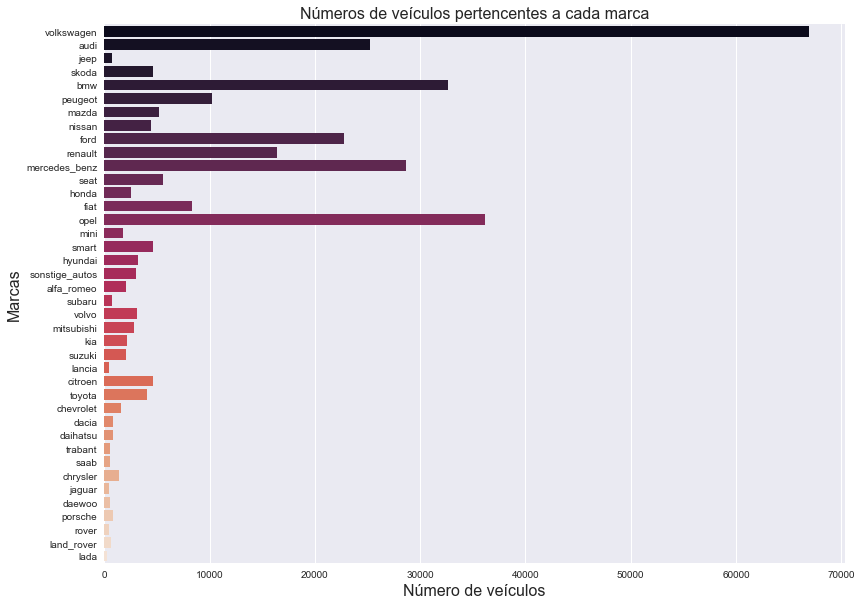

In [12]:
# Aqui criamos um gráfico de barras na horizontal que representa a quantidade de marcas por quantidade de veículos
sns.factorplot(y = 'brand', data = df_auto, kind = 'count', palette = 'rocket', size=8, aspect=1.5, orient = 'v')
plt.xlabel('Número de veículos', fontdict = {'size': 16})
plt.ylabel('Marcas', fontdict = {'size': 16})
plt.title('Números de veículos pertencentes a cada marca', fontdict = {'size': 16})

# Preço médio dos veículos com base no tipo de veículo, bem como no tipo de caixa de câmbio

Text(0.5,1,'Preço médio dos veículos com base no tipo de veículo e tipo de caixa de câmbio')

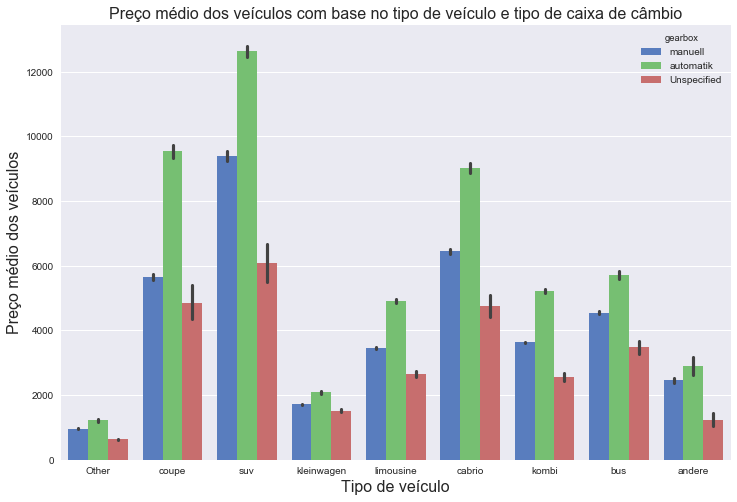

In [13]:
# Aqui criamos um gráfico de barras comparativo entre os tipos de câmbio baseado no tipo de veículo e seu preço médio
sns.barplot(x = 'vehicleType', y = 'price', data = df_auto, hue = 'gearbox', palette = 'muted')
plt.xlabel('Tipo de veículo', fontdict = {'size': 16})
plt.ylabel('Preço médio dos veículos', fontdict = {'size': 16})
plt.title('Preço médio dos veículos com base no tipo de veículo e tipo de caixa de câmbio', fontdict = {'size': 16})

# Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio

Text(0.5,1,'Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio')

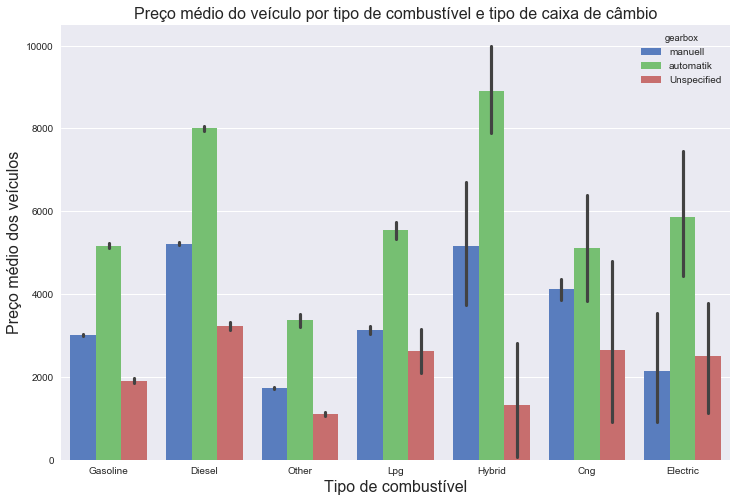

In [14]:
# Aqui criamos um gráfico de barras comparativo
sns.barplot(x = 'fuelType', y = 'price', data = df_auto, hue = 'gearbox', palette = 'muted')
plt.xlabel('Tipo de combustível', fontdict = {'size': 16})
plt.ylabel('Preço médio dos veículos', fontdict = {'size': 16})
plt.title('Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio', fontdict = {'size': 16})

# Potência média de um veículo por tipo de veículo e tipo de caixa de câmbio

Text(0.5,1,'Potência média de um veículo por tipo de veículo e tipo de caixa de câmbio')

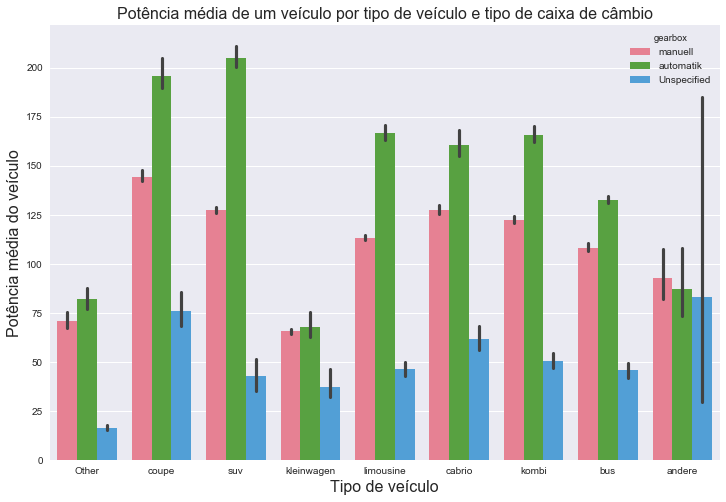

In [15]:
# Aqui criamos um gráfico de barras comparativo
sns.barplot(x = 'vehicleType', y = 'powerPS', data = df_auto, palette = 'husl', hue = 'gearbox')
plt.xlabel('Tipo de veículo', fontdict = {'size': 16})
plt.ylabel('Potência média do veículo', fontdict = {'size': 16})
plt.title('Potência média de um veículo por tipo de veículo e tipo de caixa de câmbio', fontdict = {'size': 16})

# Preço médio de um veículo por marca, bem como tipo de veículo

In [16]:
# Criando um dataframe com tipo de veículo, marca e preço médio
df = df_auto[['brand', 'vehicleType', 'price']]
df.rename(columns = {'price': 'avgPrice'}, inplace = True)
df_vehicleType_brand = df.groupby(['brand', 'vehicleType'], as_index = False)['avgPrice'].mean().sort_values(by = 'brand').reset_index(drop = True)
df_vehicleType_brand['avgPrice'] = df_vehicleType_brand['avgPrice'].astype(int)
df_vehicleType_brand.head()

,brand,vehicleType,avgPrice
0,alfa_romeo,Other,669
1,alfa_romeo,andere,962
2,alfa_romeo,cabrio,7035
3,alfa_romeo,coupe,5265
4,alfa_romeo,kleinwagen,1867


Text(0.5,1,'Heatmap - Preço médio do veículo baseado por marca e tipo')

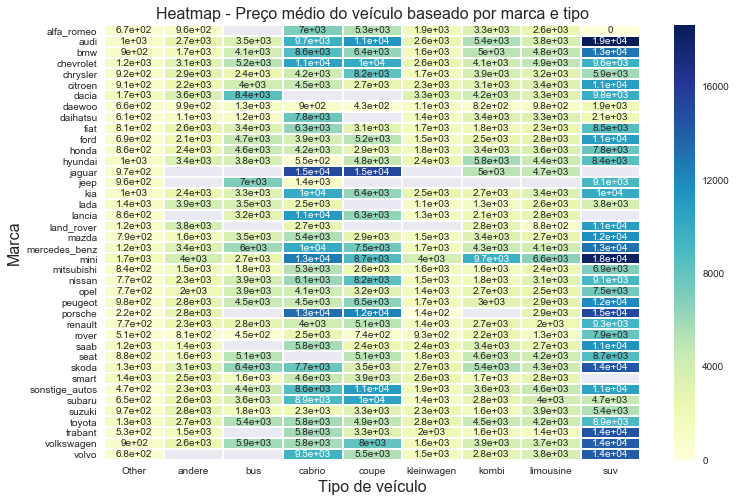

In [17]:
df_pivot = df_vehicleType_brand.pivot('brand', 'vehicleType', 'avgPrice')

sns.heatmap(df_pivot, annot=True, linewidths=1,cmap="YlGnBu", fmt = '.2g')
plt.xlabel('Tipo de veículo', fontdict = {'size': 16})
plt.ylabel('Marca', fontdict = {'size': 16})
plt.title('Heatmap - Preço médio do veículo baseado por marca e tipo', fontdict = {'size': 16})